# Plotting occupancy statistics with Python - Part 3 of 3

In earlier posts, Python and pandas were used to compute occupancy statistics. Now we will use Python to create plots based on summary occupancy statistics (such as means and percentiles) by time of day, day of week, and patient category (recall that this example is from a hospital short stay unit - [go back to Part 1](https://misken.github.io/blog/hillpy_bydate_demo/) for all of the background info). In this first installment, we will use matplotlib to create the plots. I've used matplotlib a bit but also use R and its awesome `ggplot2` package. With both packages, I feel like I'm constantly going back to square one and relearning how to do things. Of course there are tons of great galleries and examples and Q&A on StackOverflow and I use them all. However, I thought it might be useful to create a few examples of doing occupancy plots that I (and others) might find useful as a template of sorts for creating similar plots. In this first matplotlib recipe I want to create a typical graph which includes a mixture of bars and lines plotted, axis labels and some slightly complicated tick placement and labeling. 

You can find the data and the `.ipynb` file in my [hselab-tutorials](https://github.com/misken/hselab-tutorials) github repo. Clone or download a zip.

Here's the plot we are going to create:

In [1]:
from IPython.display import Image

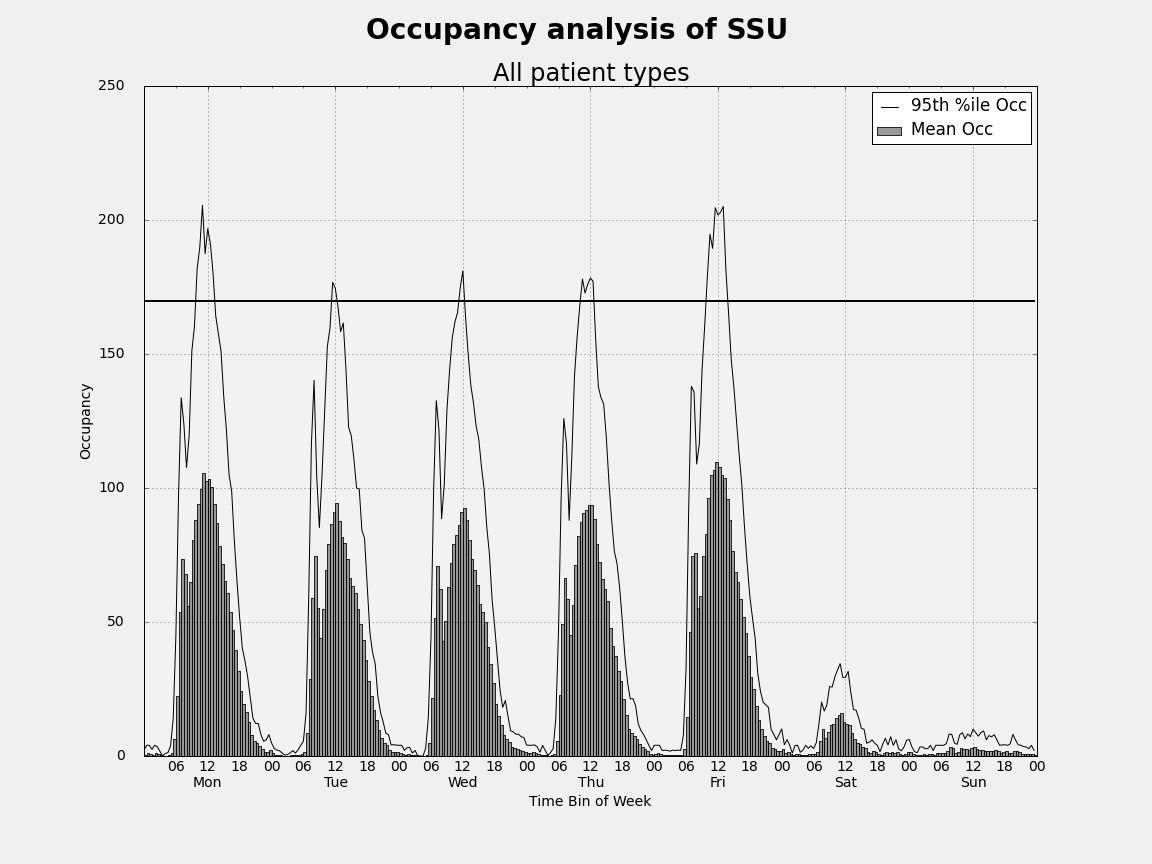

In [2]:
i = Image(filename='images/occ_fig2.png')
i

## Data Preliminaries

In [3]:
import pandas as pd
import numpy as np

At the end of Part 2 of this tutorial series, we ended up with a csv file called **occ_stats_summary.csv**. Let's read it in and take a look at it.

In [4]:
## Read sample data set and convert string dates to datetimes
occ_df = pd.read_csv('data/occ_stats_summary.csv')

Let's subset the dataframe to pull out just the rows corresponding to total occupancy. In this example, each day was divided into 48 half-hour bins (for a total of 336 bins per week).

In [5]:
total_df = occ_df[occ_df.category == 'Total'][:]

In [6]:
total_df.head()

,category,dayofweek,binofday,count,max,mean,min,p50,p55,p60,p65,p70,p75,p80,p85,p90,p95,p975,p99,stdev
1680,Total,0.0,0.0,36.0,2.533333,0.525000,0.0,0.100000,0.350000,0.500000,0.525000,0.650000,0.850000,1.000000,1.216667,1.666667,2.033333,2.183333,2.393333,0.720069
1681,Total,0.0,1.0,36.0,4.000000,0.952778,0.0,0.166667,0.683333,0.833333,1.000000,1.166667,1.516667,2.000000,2.000000,3.133333,4.000000,4.000000,4.000000,1.293166
1682,Total,0.0,2.0,36.0,7.866667,0.900926,0.0,0.000000,0.000000,0.333333,0.583333,0.833333,1.083333,1.333333,1.991667,2.966667,4.000000,4.483333,6.513333,1.679030
1683,Total,0.0,3.0,36.0,4.000000,0.414815,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.333333,0.891667,1.466667,2.466667,3.883333,3.953333,1.000173
1684,Total,0.0,4.0,36.0,4.666667,1.088889,0.0,0.316667,0.850000,1.000000,1.125000,1.433333,2.000000,2.000000,2.483333,3.600000,4.000000,4.083333,4.433333,1.421892


In [7]:
total_df.tail()

,category,dayofweek,binofday,count,max,mean,min,p50,p55,p60,p65,p70,p75,p80,p85,p90,p95,p975,p99,stdev
2011,Total,6.0,43.0,39.0,4.0,0.837607,0.0,0.0,0.45,0.66,0.960000,1.00,1.300000,1.840000,2.000000,2.560000,3.520000,4.000000,4.000000,1.185640
2012,Total,6.0,44.0,39.0,8.0,0.652137,0.0,0.0,0.00,0.00,0.000000,0.00,0.000000,0.813333,1.620000,2.240000,3.400000,4.200000,6.480000,1.584774
2013,Total,6.0,45.0,39.0,4.0,0.682051,0.0,0.0,0.27,0.56,0.646667,0.82,1.100000,1.253333,1.620000,2.080000,2.733333,3.366667,3.746667,1.020631
2014,Total,6.0,46.0,39.0,4.0,0.831624,0.0,0.0,0.15,0.44,0.853333,1.00,1.000000,1.920000,2.000000,2.400000,4.000000,4.000000,4.000000,1.279230
2015,Total,6.0,47.0,39.0,4.0,0.412821,0.0,0.0,0.00,0.00,0.166667,0.32,0.466667,0.666667,0.766667,1.226667,2.066667,2.733333,3.493333,0.838915


Notice that the integer index starts at 1680 and ends at 2015. Let's reset the index in place so that we've got an index running from 0 to 335.

In [8]:
total_df.reset_index(inplace=True)

In [9]:
total_df.head()

,index,category,dayofweek,binofday,count,max,mean,min,p50,p55,...,p65,p70,p75,p80,p85,p90,p95,p975,p99,stdev
0,1680,Total,0.0,0.0,36.0,2.533333,0.525000,0.0,0.100000,0.350000,...,0.525000,0.650000,0.850000,1.000000,1.216667,1.666667,2.033333,2.183333,2.393333,0.720069
1,1681,Total,0.0,1.0,36.0,4.000000,0.952778,0.0,0.166667,0.683333,...,1.000000,1.166667,1.516667,2.000000,2.000000,3.133333,4.000000,4.000000,4.000000,1.293166
2,1682,Total,0.0,2.0,36.0,7.866667,0.900926,0.0,0.000000,0.000000,...,0.583333,0.833333,1.083333,1.333333,1.991667,2.966667,4.000000,4.483333,6.513333,1.679030
3,1683,Total,0.0,3.0,36.0,4.000000,0.414815,0.0,0.000000,0.000000,...,0.000000,0.000000,0.041667,0.333333,0.891667,1.466667,2.466667,3.883333,3.953333,1.000173
4,1684,Total,0.0,4.0,36.0,4.666667,1.088889,0.0,0.316667,0.850000,...,1.125000,1.433333,2.000000,2.000000,2.483333,3.600000,4.000000,4.083333,4.433333,1.421892


In [10]:
total_df.tail()

,index,category,dayofweek,binofday,count,max,mean,min,p50,p55,...,p65,p70,p75,p80,p85,p90,p95,p975,p99,stdev
331,2011,Total,6.0,43.0,39.0,4.0,0.837607,0.0,0.0,0.45,...,0.960000,1.00,1.300000,1.840000,2.000000,2.560000,3.520000,4.000000,4.000000,1.185640
332,2012,Total,6.0,44.0,39.0,8.0,0.652137,0.0,0.0,0.00,...,0.000000,0.00,0.000000,0.813333,1.620000,2.240000,3.400000,4.200000,6.480000,1.584774
333,2013,Total,6.0,45.0,39.0,4.0,0.682051,0.0,0.0,0.27,...,0.646667,0.82,1.100000,1.253333,1.620000,2.080000,2.733333,3.366667,3.746667,1.020631
334,2014,Total,6.0,46.0,39.0,4.0,0.831624,0.0,0.0,0.15,...,0.853333,1.00,1.000000,1.920000,2.000000,2.400000,4.000000,4.000000,4.000000,1.279230
335,2015,Total,6.0,47.0,39.0,4.0,0.412821,0.0,0.0,0.00,...,0.166667,0.32,0.466667,0.666667,0.766667,1.226667,2.066667,2.733333,3.493333,0.838915


Plotting preliminaries
----------------------

Now, lets make some plots. We'll use matplotlib first and then try the recent port of ggplot2 to Python.

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [24]:
# Store the matplotlib style defaults so we can easily get them back. For inline work, we do this:
inline_rc = dict(mpl.rcParams) 

# For non-inline work we can do
# plt.rcdefaults()

Occupancy graph patterns
------------------------

Let's make some plots.  We will create some common patterns using matplotlib and ggplot. To start, our X-axis will just be sequence of integers from 0 to 335. Later we will modify this to use more informative day of week and time of day options.

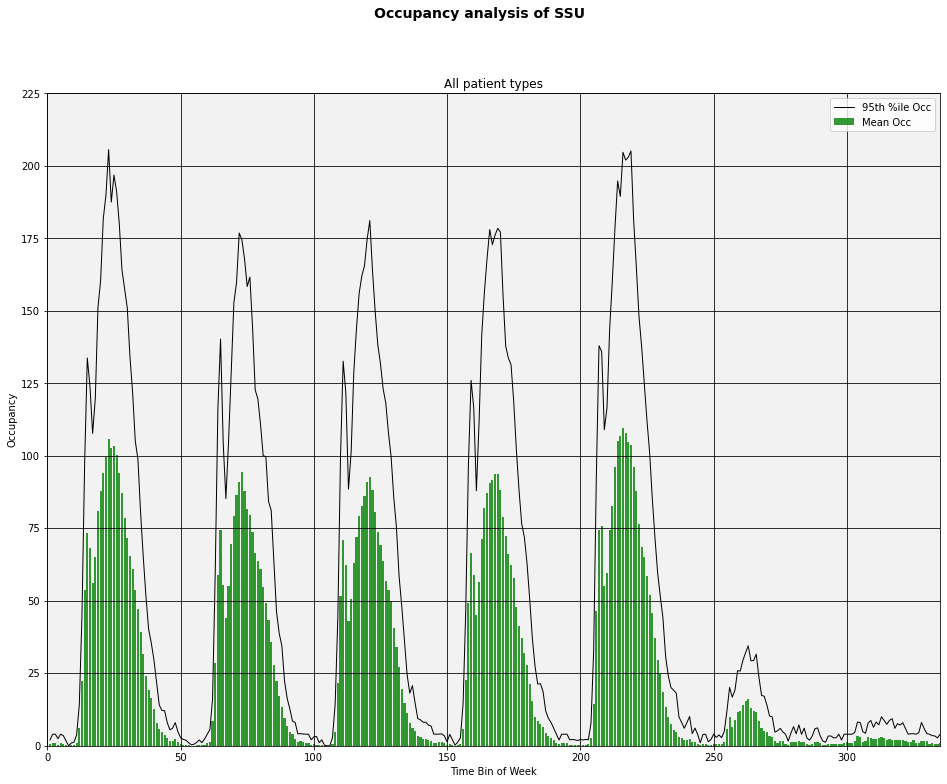

In [25]:
# Create a Figure and Axes object
#--------------------------------
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)

# Create a list to use as the X-axis values
#-------------------------------------------
time_bins = range(1,337)

# Specify the mean occupancy and percentile values
#-----------------------------------------------------------
mean_occ = total_df['mean']
pctile_occ = total_df['p95']

# Styling of bars, lines, plot area
#-----------------------------------

# Style the bars for mean occupancy
bar_color = 'green'
bar_opacity = 0.8

# Style the line for the occupancy percentile
pctile_line_style = '-'
pctile_color = 'black'
pctile_line_width = 1


# Set the background color of the plot. Argument is a string float in
# (0,1) representing greyscale (0=black, 1=white)
ax1.patch.set_facecolor('0.95')

# Can also use color names or hex color codes
# ax1.patch.set_facecolor('yellow')
# ax1.patch.set_facecolor('#FFFFAD')


# Add data to the plot
#--------------------------

# Mean occupancy as bars
ax1.bar(time_bins,mean_occ, color=bar_color, alpha=bar_opacity, label='Mean Occ')

# Some percentile aas a line
ax1.plot(time_bins,pctile_occ, linestyle=pctile_line_style, linewidth=pctile_line_width, color=pctile_color, \
         label='95th %ile Occ')

# Set x-axis limits
ax1.set_xlim([0,335])

# Set y-axis limits
ax1.set_ylim([0,225])

# Add other chart elements
#-------------------------

# Set plot and axis titles
fig1.suptitle('Occupancy analysis of SSU', fontsize=14, fontweight='bold')
ax1.set_title('All patient types')
ax1.set_xlabel('Time Bin of Week')
ax1.set_ylabel('Occupancy')

# Gridlines
ax1.grid(True, color='k')

# Legend
ax1.legend(loc='best')

# Plot size
fig1.set_size_inches(16,12)

Let's add a capacity line at 170. One way to do this is to add another data series to the plot consisting of y-values of 170.

In [26]:
# Add a constant valued column to the dataframe
total_df['Capacity'] = 170

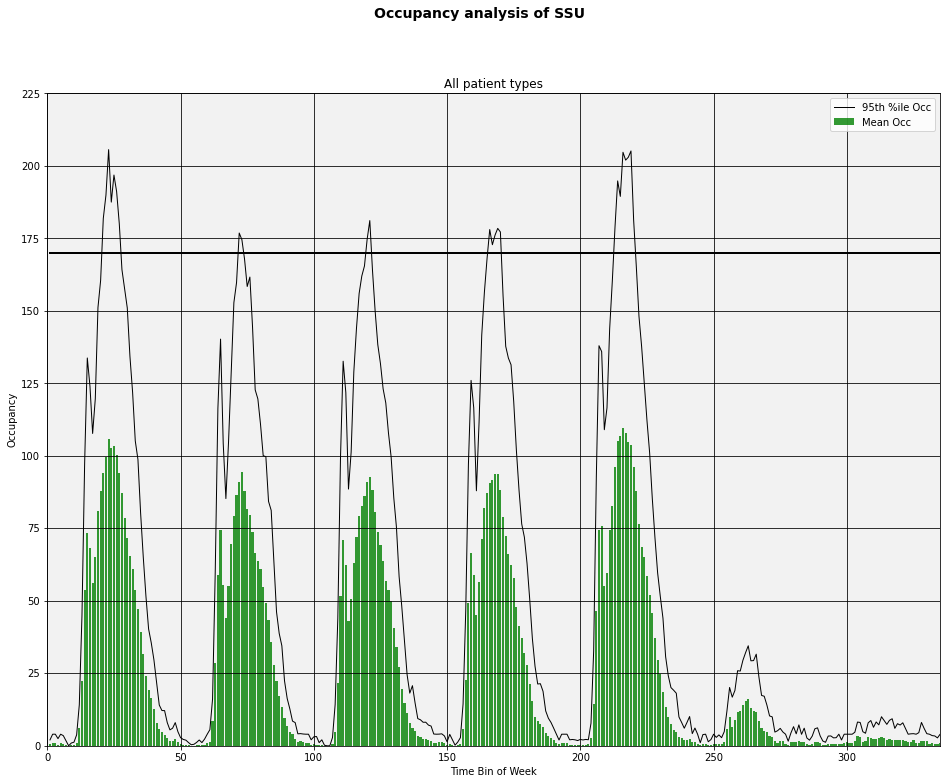

In [27]:
capacity_line_style = '-'
capacity_color = 'black'
capacity_line_width = 2

ax1.plot(time_bins,total_df['Capacity'],linestyle=capacity_line_style, linewidth=capacity_line_width, color=capacity_color)
display(fig1)

Now let's work on relabling the X-axis with days of the week and times. I struggled with this but along the way learned a few things. I'll share some of my fumbling. 

One approach might be to create a week of timestamps at the correct frequency and then use formatting to control how they display as axis labels. Pandas has a convenience function called [date_range](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html) that makes it easy to create an object consisting of a bunch of datetime values of any frequency desired.

In [28]:
# 336 half hours starting with midnight Dec 14, 2014
timestamps = pd.date_range('12/15/2014', periods=336, freq='30Min')

# What is this timestamps object we've created?
timestamps

DatetimeIndex(['2014-12-15 00:00:00', '2014-12-15 00:30:00',
               '2014-12-15 01:00:00', '2014-12-15 01:30:00',
               '2014-12-15 02:00:00', '2014-12-15 02:30:00',
               '2014-12-15 03:00:00', '2014-12-15 03:30:00',
               '2014-12-15 04:00:00', '2014-12-15 04:30:00',
               ...
               '2014-12-21 19:00:00', '2014-12-21 19:30:00',
               '2014-12-21 20:00:00', '2014-12-21 20:30:00',
               '2014-12-21 21:00:00', '2014-12-21 21:30:00',
               '2014-12-21 22:00:00', '2014-12-21 22:30:00',
               '2014-12-21 23:00:00', '2014-12-21 23:30:00'],
              dtype='datetime64[ns]', length=336, freq='30T')

It's a pandas index. Hmmm, I wonder if we can use this directly for our X-axis values and/or tick labels? If not, we can always convert it to a list or a pandas `Series` object. At least one of these things should work.

In [29]:
# First 10 elements of a list version of timestamps
timestamps.tolist()[0:10]

[Timestamp('2014-12-15 00:00:00', freq='30T'),
 Timestamp('2014-12-15 00:30:00', freq='30T'),
 Timestamp('2014-12-15 01:00:00', freq='30T'),
 Timestamp('2014-12-15 01:30:00', freq='30T'),
 Timestamp('2014-12-15 02:00:00', freq='30T'),
 Timestamp('2014-12-15 02:30:00', freq='30T'),
 Timestamp('2014-12-15 03:00:00', freq='30T'),
 Timestamp('2014-12-15 03:30:00', freq='30T'),
 Timestamp('2014-12-15 04:00:00', freq='30T'),
 Timestamp('2014-12-15 04:30:00', freq='30T')]

In [30]:
# Pandas series version of timestamps
pd.Series(timestamps)

0     2014-12-15 00:00:00
1     2014-12-15 00:30:00
2     2014-12-15 01:00:00
3     2014-12-15 01:30:00
4     2014-12-15 02:00:00
              ...        
331   2014-12-21 21:30:00
332   2014-12-21 22:00:00
333   2014-12-21 22:30:00
334   2014-12-21 23:00:00
335   2014-12-21 23:30:00
Length: 336, dtype: datetime64[ns]

Obviously we can't label every half hour with a datetime stamp. What we can do is create lists of datetimes to use as the locations of major and minor tick labels. Again, we can take advantage of some pandas functionality.

In [31]:
major_tick_locations = pd.date_range('12/15/2014 12:00:00', periods=7, freq='24H').tolist()
minor_tick_locations = pd.date_range('12/15/2014 06:00:00', periods=28, freq='6H').tolist()

In [32]:
major_tick_locations

[Timestamp('2014-12-15 12:00:00', freq='24H'),
 Timestamp('2014-12-16 12:00:00', freq='24H'),
 Timestamp('2014-12-17 12:00:00', freq='24H'),
 Timestamp('2014-12-18 12:00:00', freq='24H'),
 Timestamp('2014-12-19 12:00:00', freq='24H'),
 Timestamp('2014-12-20 12:00:00', freq='24H'),
 Timestamp('2014-12-21 12:00:00', freq='24H')]

In [33]:
minor_tick_locations

[Timestamp('2014-12-15 06:00:00', freq='6H'),
 Timestamp('2014-12-15 12:00:00', freq='6H'),
 Timestamp('2014-12-15 18:00:00', freq='6H'),
 Timestamp('2014-12-16 00:00:00', freq='6H'),
 Timestamp('2014-12-16 06:00:00', freq='6H'),
 Timestamp('2014-12-16 12:00:00', freq='6H'),
 Timestamp('2014-12-16 18:00:00', freq='6H'),
 Timestamp('2014-12-17 00:00:00', freq='6H'),
 Timestamp('2014-12-17 06:00:00', freq='6H'),
 Timestamp('2014-12-17 12:00:00', freq='6H'),
 Timestamp('2014-12-17 18:00:00', freq='6H'),
 Timestamp('2014-12-18 00:00:00', freq='6H'),
 Timestamp('2014-12-18 06:00:00', freq='6H'),
 Timestamp('2014-12-18 12:00:00', freq='6H'),
 Timestamp('2014-12-18 18:00:00', freq='6H'),
 Timestamp('2014-12-19 00:00:00', freq='6H'),
 Timestamp('2014-12-19 06:00:00', freq='6H'),
 Timestamp('2014-12-19 12:00:00', freq='6H'),
 Timestamp('2014-12-19 18:00:00', freq='6H'),
 Timestamp('2014-12-20 00:00:00', freq='6H'),
 Timestamp('2014-12-20 06:00:00', freq='6H'),
 Timestamp('2014-12-20 12:00:00', 

Now that we can set the locations of major and minor tick labels, we can use matplotlib's [DateFormatter](http://matplotlib.org/api/dates_api.html#date-formatters) function to control how the labels look. DateFormatter uses `strftime()` format strings - see [http://strftime.org/](http://strftime.org/). We aren't using the date part other than to get at the day of week.

The other formatting related thing we want to do is to have the days of the week labels appear underneath the hour of day labels. As you'll see below, we can pull this off using `pad` argument of the `tick_params()` function. A useful reference for this is [http://stackoverflow.com/questions/14800973/matplotlib-tick-labels-position-relative-to-axes](http://stackoverflow.com/questions/14800973/matplotlib-tick-labels-position-relative-to-axes).

Now that the X-axis values are datetimes, another evil "gotcha" rears its ugly head. By default, the width of the bars representing mean occupancy will be equal to 1. Hmm, 1 what? 1 unit on the X-axis. I figured that would be one half-hour bin. Nope. It's 1 day (since time durations less than one day are simply fractions of the day). So, by default you get bars that are huge (one day wide) and they obscure each other. Solution, use the `width` option to set the bar width to 1/(number of bins in the day). In our case, we set `width = 1/48`. If you want to see what things look like if you don't do this, just edit the appropriate line and set `width = 1`.

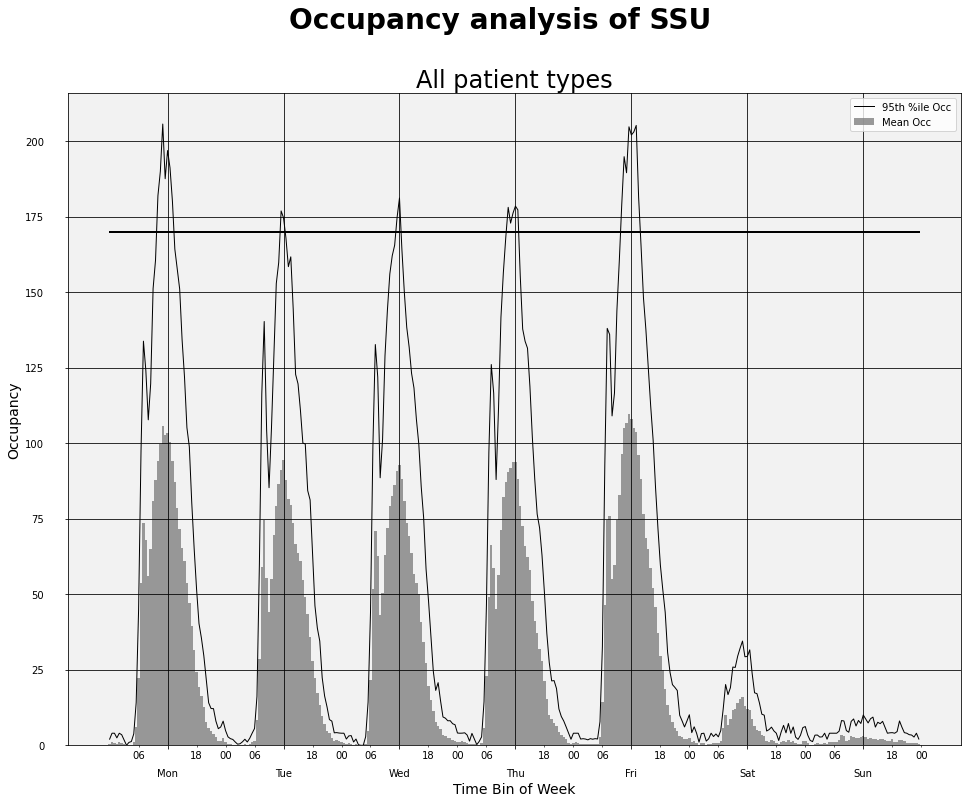

In [34]:
# Create a Figure and Axes object
#--------------------------------
fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)

# Create a list to use as the X-axis values
#-------------------------------------------
# 336 half hours starting with midnight Dec 14, 2014
timestamps = pd.date_range('12/15/2014', periods=336, freq='30Min').tolist()



# Styling of bars, lines, plot area
#-----------------------------------

# Style the bars for mean occupancy
bar_color = 'grey'
bar_opacity = 0.8

# Style the line for the occupancy percentile and capacity
pctile_line_style = '-'
pctile_color = 'black'
pctile_line_width = 1

capacity_line_style = '-'
capacity_color = 'black'
capacity_line_width = 2


# Set the background color of the plot. Argument is a string float in
# (0,1) representing greyscale (0=black, 1=white)
ax2.patch.set_facecolor('0.95')

# Can also use color names or hex color codes
# ax2.patch.set_facecolor('yellow')
# ax2.patch.set_facecolor('#FFFFAD')


# Add data to the plot
#--------------------------

# Mean occupancy as bars - here's the GOTCHA involving the bar width
ax2.bar(timestamps,mean_occ, color=bar_color, alpha=bar_opacity, label='Mean Occ', width=1/48)

# Some percentile aas a line
ax2.plot(timestamps,pctile_occ, linestyle=pctile_line_style, linewidth=pctile_line_width, color=pctile_color, \
         label='95th %ile Occ')

ax2.plot(timestamps,total_df['Capacity'],linestyle=capacity_line_style, linewidth=capacity_line_width, color=capacity_color)


# Create formatter variables
dayofweek_formatter = DateFormatter('%a')
qtrday_formatter = DateFormatter('%H')

# Set the tick locations for the axes object
ax2.set_xticks(major_tick_locations)
ax2.set_xticks(minor_tick_locations, minor=True)

# Format the tick labels
ax2.xaxis.set_major_formatter(dayofweek_formatter)
ax2.xaxis.set_minor_formatter(qtrday_formatter)

# Slide the major tick labels underneath the default location by 20 points
ax2.tick_params(which='major', pad=20)

# Add other chart elements
#-------------------------

# Set plot and axis titles
fig2.suptitle('Occupancy analysis of SSU', fontsize=28, fontweight='bold')
ax2.set_title('All patient types', fontsize=24)
ax2.set_xlabel('Time Bin of Week', fontsize=14)
ax2.set_ylabel('Occupancy', fontsize=14)

# Gridlines
ax2.grid(True, color='k')

# Legend
ax2.legend(loc='best')

# Plot size
fig2.set_size_inches(16,12)


Using matplotlib stylesheets
----------------------------

Matplotlib has a package called `style` that makes it easy to switch between predefined styles for your graphs. There are a few built-in styles. For example, you can make your plots look like the default plots you get with the R package `ggplot2` or like those found on Nate Silver's 538 blog. You can create your own stylesheets, too.

Get all the details at [http://matplotlib.org/users/style_sheets.html](http://matplotlib.org/users/style_sheets.html). 

In [35]:
#Let's check out the built-in style sheets
print (plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Let's start with the ggplot style.

In [36]:
plt.style.use('ggplot')

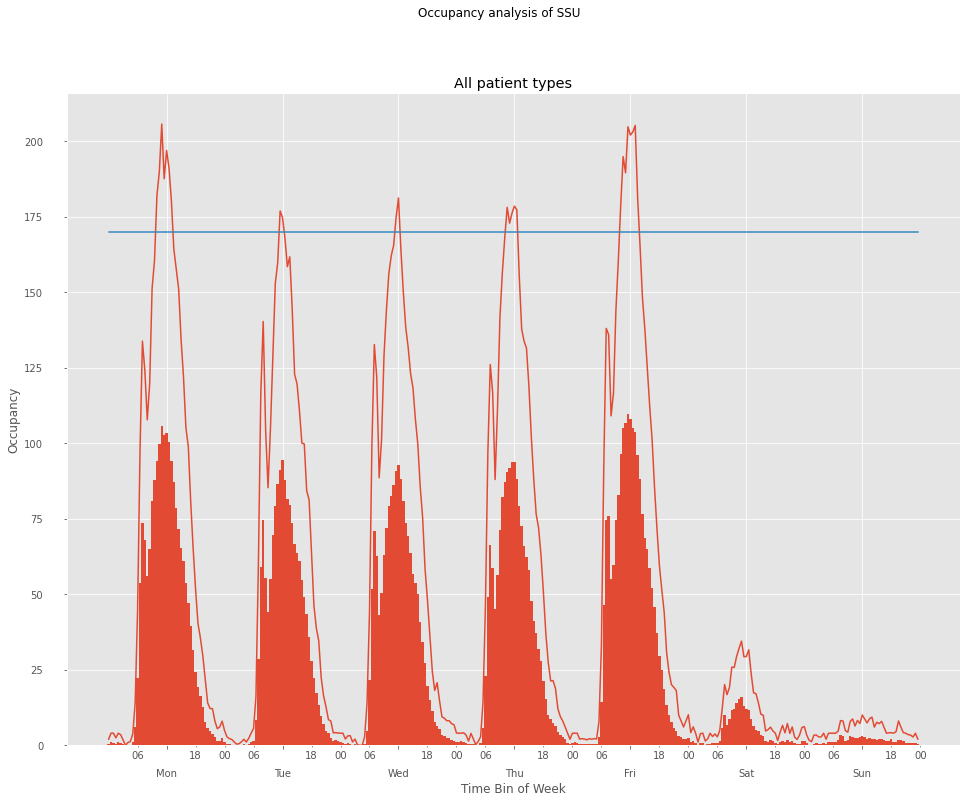

In [37]:
# Create a Figure and Axes object
#--------------------------------
fig3 = plt.figure()
ax3 = fig3.add_subplot(1,1,1)

# Create a list to use as the X-axis values
#-------------------------------------------
# 336 half hours starting with midnight Dec 14, 2014
timestamps = pd.date_range('12/15/2014', periods=336, freq='30Min').tolist()


# Add data to the plot
#--------------------------


ax3.bar(timestamps,mean_occ, width=1/48)
ax3.plot(timestamps,pctile_occ, label='95th %ile Occ')
ax3.plot(timestamps,total_df['Capacity'])


# Create formatter variables
dayofweek_formatter = DateFormatter('%a')
qtrday_formatter = DateFormatter('%H')

# Set the tick locations for the axes object
ax3.set_xticks(major_tick_locations)
ax3.set_xticks(minor_tick_locations, minor=True)

# Format the tick labels
ax3.xaxis.set_major_formatter(dayofweek_formatter)
ax3.xaxis.set_minor_formatter(qtrday_formatter)

# Slide the major tick labels underneath the default location by 20 points
ax3.tick_params(which='major', pad=20)

# Add other chart elements
#-------------------------

# Set plot and axis titles
fig3.suptitle('Occupancy analysis of SSU')
ax3.set_title('All patient types')
ax3.set_xlabel('Time Bin of Week')
ax3.set_ylabel('Occupancy')


# Plot size
fig3.set_size_inches(16,12)


Before trying out a different style, it's a good idea to reset the matplotlib settings to their defaults. That's why we saved the default settings in a variable called `inline_rc` which is simply a dictionary of settings and their values. I haven't had much luck with trying to use `plt.style.use` for a second time unless I do a reset of the plot setting. Here's how to do that.

In [39]:
# Reset plot settings to defaults
mpl.rcParams.update(inline_rc)

In [40]:
# Try out a different built-in style
plt.style.use('fivethirtyeight')

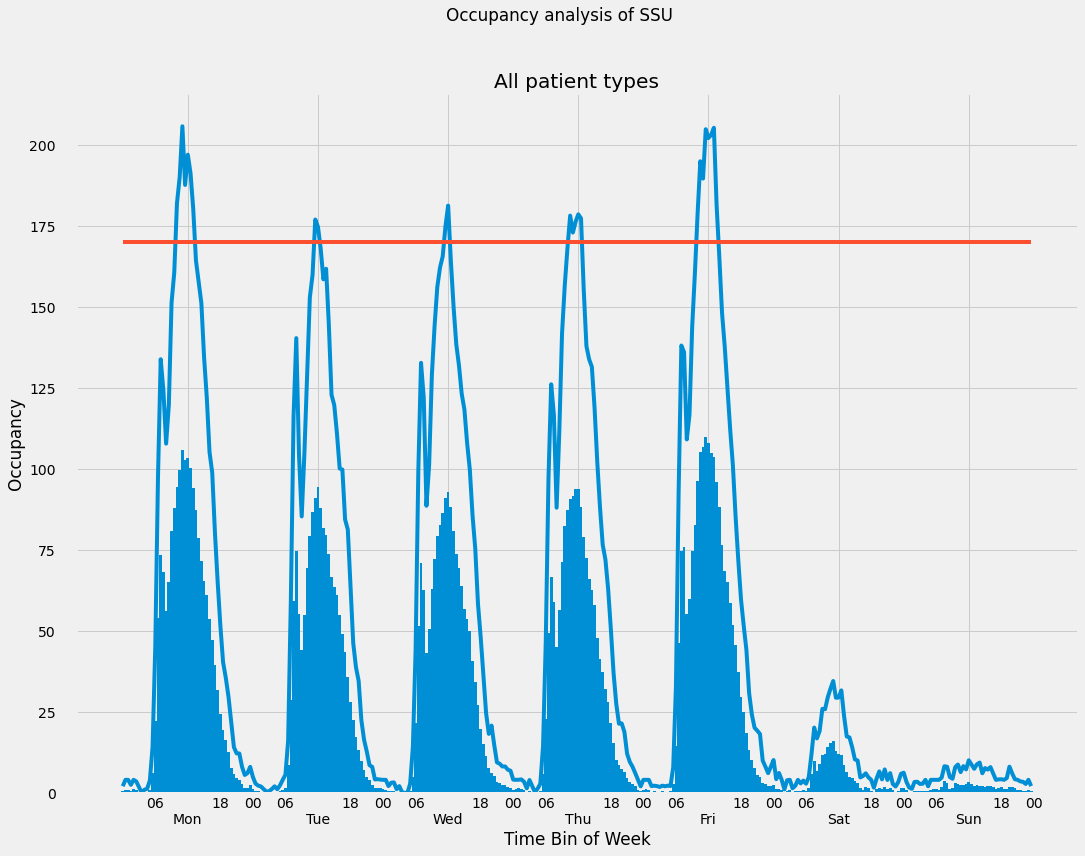

In [41]:
# Create a Figure and Axes object
#--------------------------------
fig3 = plt.figure()
ax3 = fig3.add_subplot(1,1,1)

# Create a list to use as the X-axis values
#-------------------------------------------
# 336 half hours starting with midnight Dec 14, 2014
timestamps = pd.date_range('12/15/2014', periods=336, freq='30Min').tolist()


# Add data to the plot
#--------------------------


ax3.bar(timestamps,mean_occ, width=1/48)
ax3.plot(timestamps,pctile_occ, label='95th %ile Occ')
ax3.plot(timestamps,total_df['Capacity'])


# Create formatter variables
dayofweek_formatter = DateFormatter('%a')
qtrday_formatter = DateFormatter('%H')

# Set the tick locations for the axes object
ax3.set_xticks(major_tick_locations)
ax3.set_xticks(minor_tick_locations, minor=True)

# Format the tick labels
ax3.xaxis.set_major_formatter(dayofweek_formatter)
ax3.xaxis.set_minor_formatter(qtrday_formatter)

# Slide the major tick labels underneath the default location by 20 points
ax3.tick_params(which='major', pad=20)

# Add other chart elements
#-------------------------

# Set plot and axis titles
fig3.suptitle('Occupancy analysis of SSU')
ax3.set_title('All patient types')
ax3.set_xlabel('Time Bin of Week')
ax3.set_ylabel('Occupancy')


# Plot size
fig3.set_size_inches(16,12)

In [42]:
# Save one of the images to a file
fig2.savefig('occ_fig2.png')

In a future post, we'll rebuild these plots using `ggplot2`.